# KNN sobre músicas

In [1]:
musicas = [
    ['Open','Yellow Claw',0.522,0.8600],
    ['Outlines','AlunaGeorge',0.741,0.4490],
    ['Step','Vampire Weekend',0.624,0.7240],
    ['Dont Threaten Me With A Good Time','Panic! At The Disco',0.559,0.8950],
    ['Kissing Strangers','DNCE',0.776,0.7410],
    ['Satellite','SALTNPAPER',0.385,0.4040],
    ['The Devils Den','Skrillex',0.616,0.9460],
    ['Sleepwalk','Santo & Johnny',0.444,0.4120],
    ['We Dem Boyz','Wiz Khalifa',0.717,0.8620],
    ['Pyramids','Frank Ocean',0.405,0.6470],
    ['Hannah Hunt','Vampire Weekend',0.345,0.3130],
    ['Save the World','Swedish House Mafia',0.654,0.7340],
    ['Im in LOVE With GO-GO Dance','Trendsetter',0.510,0.6030],
    ['Spacer Woman - Vocal','Charlie',0.742,0.9650],
    ['Where or When','Wynton Marsalis',0.326,0.0575],
    ['dance alot','Various Artists',0.466,0.9430],
    ['GOT IT GOOD','KAYTRANADA',0.606,0.5030],
    ['Agadoo - original','Black Lace',0.618,0.9600],
    ['Truths & Rights','Johnny Osbourne',0.770,0.4090],
    ['White Iverson','Post Malone',0.676,0.5280]
]

## Tratamento dos dados:
Colocando tudo em python dict

Calcula-se um "joy_vect" com o objetivo de calcular a distância em que a música se encontra, levando com consideraçao um plano danceability x energy, sendo  0<=danceability<=1 e 0<=energy<=1.

A música mais triste seria (0,0) e a mais alegre (1,1).

O "joy_vect" seria o vetor em relação a (0,0) 

In [2]:
music_list = [] # tratamento dos dados: colocando as músicas em dicionários
for m in musicas:
    m_dict = {
        "song_title": m[0],
        "artist": m[1],
        "danceability": m[2],
        "energy": m[3],
        "joy_vect": (m[2]*m[2] + m[3]*m[3])**(0.5)
    }
    music_list.append(m_dict)

## Ordenando as músicas usando o "joy_vect" como parametro.

In [3]:
musics_list = sorted(music_list, key=lambda k: k['joy_vect'])

## Imprimindo o resultado

In [4]:
print(f'A música mais triste é "{music_list[0]["song_title"]}" de {music_list[0]["artist"]}.')
print(f'A música mais alegre é "{music_list[-1]["song_title"]}" de {music_list[-1]["artist"]}.')

A música mais triste é "Open" de Yellow Claw.
A música mais alegre é "White Iverson" de Post Malone.


> "Where or When": https://www.youtube.com/watch?v=9hKnP1WfsjE

> "Spacer Woman":  https://www.youtube.com/watch?v=nZDPCjEoIMI

## Com Pandas e MatplotLib
Para explorar os dados mais um pouquinho

## Importando as bibliotecas Pandas e MatplotLib

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Frame

In [6]:
df_musics = pd.DataFrame(music_list)
df_musics

,song_title,artist,danceability,energy,joy_vect
0,Open,Yellow Claw,0.522,0.8600,1.006024
1,Outlines,AlunaGeorge,0.741,0.4490,0.866419
2,Step,Vampire Weekend,0.624,0.7240,0.955799
3,Dont Threaten Me With A Good Time,Panic! At The Disco,0.559,0.8950,1.055228
4,Kissing Strangers,DNCE,0.776,0.7410,1.072966
5,Satellite,SALTNPAPER,0.385,0.4040,0.558069
6,The Devils Den,Skrillex,0.616,0.9460,1.128881
7,Sleepwalk,Santo & Johnny,0.444,0.4120,0.605706
8,We Dem Boyz,Wiz Khalifa,0.717,0.8620,1.121219
9,Pyramids,Frank Ocean,0.405,0.6470,0.763305


## Obtendo dados estatísticos

In [7]:
df_musics.describe()

,danceability,energy,joy_vect
count,20.00000,20.000000,20.000000
mean,0.57510,0.647775,0.881570
std,0.14393,0.257268,0.242238
min,0.32600,0.057500,0.331032
25%,0.46050,0.439750,0.781493
50%,0.61100,0.685500,0.913841
75%,0.68625,0.870250,1.059663
max,0.77600,0.965000,1.217288


### Música mais alegre
Máximo do joy_vect.

Interessante notar que danceabilidade e energia tem valores altos.

In [8]:
df_musics[df_musics.joy_vect == df_musics.joy_vect.max()]

,song_title,artist,danceability,energy,joy_vect
13,Spacer Woman - Vocal,Charlie,0.742,0.965,1.217288


### Música mais Triste
Valor mínimo do joy_vect

Como esperado, danceabilidade baixa e energia muitíssimo baixa.

In [9]:
df_musics[df_musics.joy_vect == df_musics.joy_vect.min()]

,song_title,artist,danceability,energy,joy_vect
14,Where or When,Wynton Marsalis,0.326,0.0575,0.331032


## Scatter Plot
Para dar uma olhada em como as músicas estão distribuídas danceability x energy

<AxesSubplot:xlabel='danceability', ylabel='energy'>

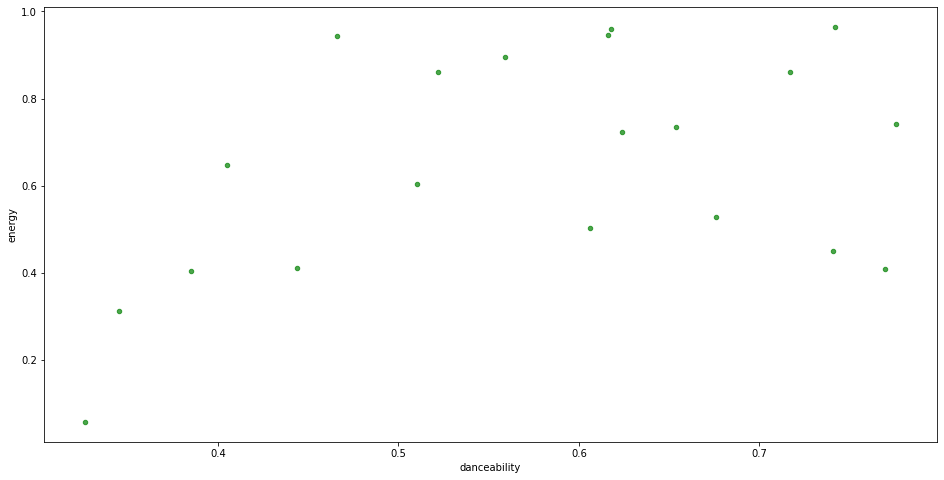

In [10]:
df_musics.plot.scatter(x="danceability", y="energy", alpha=0.7, figsize=(16, 8), color="green")

## Boxplot
Para visualizar os dados estatísticos graficamente

<AxesSubplot:>

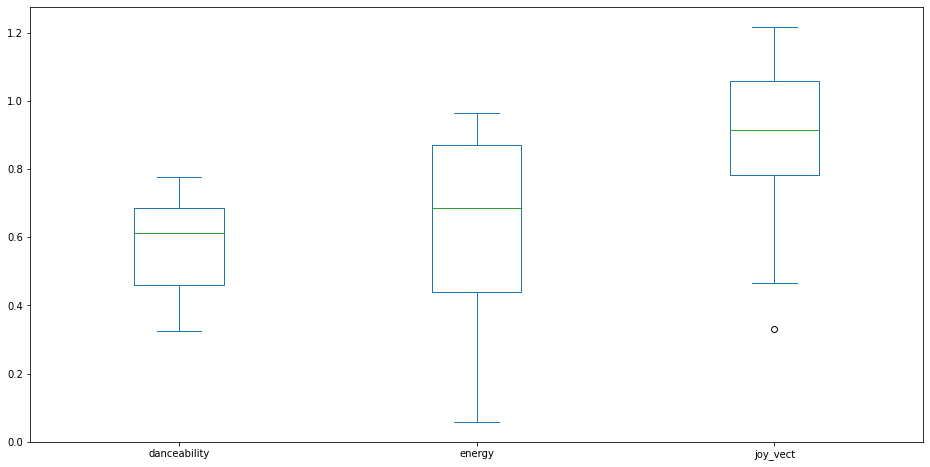

In [11]:
df_musics.plot.box(figsize=(16, 8))